# API Info


#### API Endpoint: https://data.cdc.gov/resource/bi63-dtpu.json


## API Key Name: jackcdc
## API Key ID
### 4lc7ux4k2u59njtqbo0q3rc38


## API Key Secret
### 5o5h56aqbrxg7hkk6hwkpfw8mds14mjdi6vx19cr8a5grsmw64

## App Token

## Name: Red Team
### Description: Leading Causes of Death in the US (Demographic)
### App Token: hNveEHoHFw2ApROevURCpKviv

# CDC Info


In [9]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("bi63-dtpu", limit=4000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [10]:
results_df

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
...,...,...,...,...,...,...
3995,2017,Diabetes mellitus (E10-E14),Diabetes,South Carolina,1535,24.5
3996,2015,Diabetes mellitus (E10-E14),Diabetes,Montana,321,24.5
3997,2011,Diabetes mellitus (E10-E14),Diabetes,North Dakota,207,24.5
3998,2010,Alzheimer's disease (G30),Alzheimer's disease,Virginia,1848,24.5


In [11]:
# Loading file to CSV
output_file_path = 'Resources/results_df.csv'
results_df.to_csv(output_file_path, index=False)

In [12]:
# To view columns (What data is available)
results_df.columns

Index(['year', '_113_cause_name', 'cause_name', 'state', 'deaths', 'aadr'], dtype='object')

# Note: aadr = Age-Adjusted Death Rate

In [13]:
# What type of data is available? List DF data types
results_df.dtypes

year               object
_113_cause_name    object
cause_name         object
state              object
deaths             object
aadr               object
dtype: object

In [14]:
# Find null values
for column in results_df.columns:
    print(f"Column {column} has {results_df[column].isnull().sum()} null values")

Column year has 0 null values
Column _113_cause_name has 0 null values
Column cause_name has 0 null values
Column state has 0 null values
Column deaths has 0 null values
Column aadr has 0 null values


In [15]:
# Find duplicate entries
print(f"Duplicate entries: {results_df.duplicated().sum()}")

Duplicate entries: 0


In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv(Path('./Resources/results_df.csv'))
df.head()

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8


The target variable is cause_name, meaning that the goal of the linear regression model is to predict a person's cause of death based on state.

First, let's visually inspect the relationship between State and cause_name:

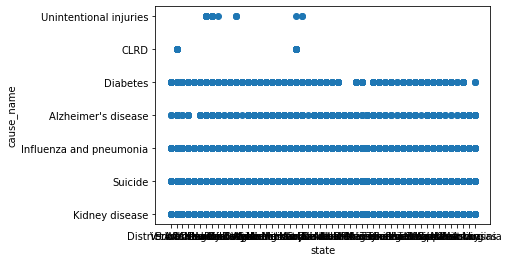

In [19]:
plt.scatter(df.state, df.cause_name)
plt.xlabel('state')
plt.ylabel('cause_name')
plt.show()

We want to use the available data to make the most accurate predictions possible.

The next line of code formats the data to meet the requirements of the Scikit-learn library:

In the scatter plot, state was placed on the x-axis. Conventionally, the independent variable is placed on the x-axis, and the dependent variable is placed on the y-axis. The state is the independent variable here because we assume that cause_name depends on the state.

The values from the state column are modified by the reshape() method. This method allows data needs to be formatted, or shaped, to follow Scikit-learn's specifications as follows:

The first argument of reshape() specifies the number of rows. Here, the argument is -1, and means that the number of rows is unspecified. Accordingly, the NumPy library will automatically identify the number of rows in the dataset.

The second argument of reshape() refers to the number of columns. Here, the argument is 1, meaning that there is only one column of independent variables.

When we examine the first five entries in X, we see that the output is a two-dimensional NumPy array:


In [21]:
X = df.state.values.reshape(-1, 1)

In [22]:
X[:5]

array([['Vermont'],
       ['Vermont'],
       ['Vermont'],
       ['Vermont'],
       ['District of Columbia']], dtype=object)

In [23]:
# When we examine the shape of X, we see that there 
# are 4000 rows and 1 column:

X.shape

(4000, 1)

Next, we assign the target variable, or the cause_name column, to y. Although it's possible to reshape this column, as we did with X, it's not required in this instance:

In [24]:
y = df.cause_name

The next step is to create an instance of the linear regression model. An object is instantiated, or created, from sklearn.linear_model's LinearRegression class. Instantiation here means that the LinearRegression class is like a template that contains the algorithms required to perform linear regression. From this template, a specific object called model is created that will analyze the data and store information specific to this dataset:

In [25]:
model = LinearRegression()

In [26]:
model.fit(X, y)

ValueError: could not convert string to float: 'Vermont'

#  Categorical and text data must therefore be converted to numerical data for use in machine learning—which is what we'll do in this section.

In [28]:
import pandas as pd
from path import Path

file_path = Path("Resources/results_df.csv")
df1 = pd.read_csv(file_path)
df1.head()

,year,_113_cause_name,cause_name,state,deaths,aadr
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2017,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,29,3.3
2,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
3,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
4,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8


In [29]:
results_df.columns

Index(['year', '_113_cause_name', 'cause_name', 'state', 'deaths', 'aadr'], dtype='object')

In [30]:
results_df.dtypes

year               object
_113_cause_name    object
cause_name         object
state              object
deaths             object
aadr               object
dtype: object

In [32]:
df2 = results_df.drop(['_113_cause_name'], axis=1)
df2

,year,cause_name,state,deaths,aadr
0,2012,Kidney disease,Vermont,21,2.6
1,2017,Kidney disease,Vermont,29,3.3
2,2016,Kidney disease,Vermont,30,3.7
3,2013,Kidney disease,Vermont,30,3.8
4,2000,Suicide,District of Columbia,23,3.8
...,...,...,...,...,...
3995,2017,Diabetes,South Carolina,1535,24.5
3996,2015,Diabetes,Montana,321,24.5
3997,2011,Diabetes,North Dakota,207,24.5
3998,2010,Alzheimer's disease,Virginia,1848,24.5


The first and the simplest encoding we'll perform in this dataset is with the year column,  We'll convert these values into numerical ones with the pd.get_dummies() method:

